# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +28.18149096140                   -1.42    5.18s
  2   +18.62384914747        0.98       -0.92   10.6ms
  3   +13.69889465589        0.69       -0.54   10.4ms
  4   +12.37180398166        0.12       -0.35   8.42ms
  5   +11.55932134026       -0.09       -0.50   8.34ms
  6   +9.973283124906        0.20       -0.52   8.37ms
  7   +8.994456913736       -0.01       -0.55   8.36ms
  8   +8.665584199688       -0.48       -0.79   8.45ms
  9   +8.590943625653       -1.13       -1.10   6.41ms
 10   +8.531737079274       -1.23       -1.08   6.44ms
 11   +8.425587559809       -0.97       -0.97   8.39ms
 12   +8.357725187684       -1.17       -1.08   6.39ms
 13   +8.280349529391       -1.11       -1.19   6.39ms
 14   +8.194504245323       -1.07       -1.22   6.44ms
 15   +8.157002050129       -1.43       -1.11   6.47ms
 16   +8.100167284330       -1.25       -1.20   6.38ms
 17   +8.06

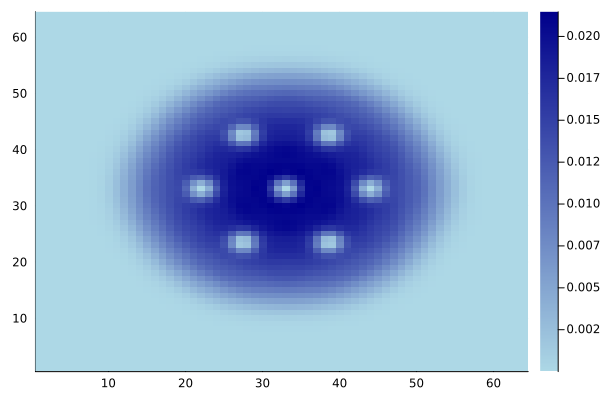

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)